Caso de estudio una población sudafricana con alto riesgo de enfermedad coronaria. El dataset, que en cada registro presenta un individuo hombre, incluye las siguientes variables:

    sbp: presión sanguínea sistólica
    tobacco: cantidad de tabaco acumulada (en kg)
    ldl: colesterol de lipoproteinas de baja densidad
    adiposity: grado de tejido adiposo
    famhist: indica si la familia del individuo tiene historia de enfermedades coronarias ("Present") o no ("Absent")
    typea: comportamiento tipo A ??
    obesidad: grado de obesidad
    alcohol: consumo de alcohol actual
    age: edad
    chd: variable objetivo que indica si el individuo tiene enfermedad coronaria (1) o no (0)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
# opcional para sacar el accuracy en clasificacion
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [24]:
df=pd.read_csv("heart_disease.csv", sep=';', decimal=',')

In [25]:
df

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd_cod,famhistCod
0,160,12.00,5.73,23.11,49,25.30,97.20,52,2,2
1,144,0.01,4.41,28.61,55,28.87,2.06,63,2,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1,2
3,170,7.50,6.41,38.03,51,31.99,24.26,58,2,2
4,134,13.60,3.50,27.78,60,25.99,57.34,49,2,2
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,1,1
458,182,4.20,4.41,32.10,52,28.61,18.72,52,2,1
459,108,3.00,1.59,15.23,40,20.09,26.64,55,1,1
460,118,5.40,11.61,30.79,64,27.35,23.97,40,1,1


In [26]:
# podemos realizar las describtibas con describe()
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd_cod,famhistCod
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,1.346320,1.415584
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313,0.493357
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,1.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,1.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,1.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,2.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,2.000000,2.000000


<AxesSubplot:>

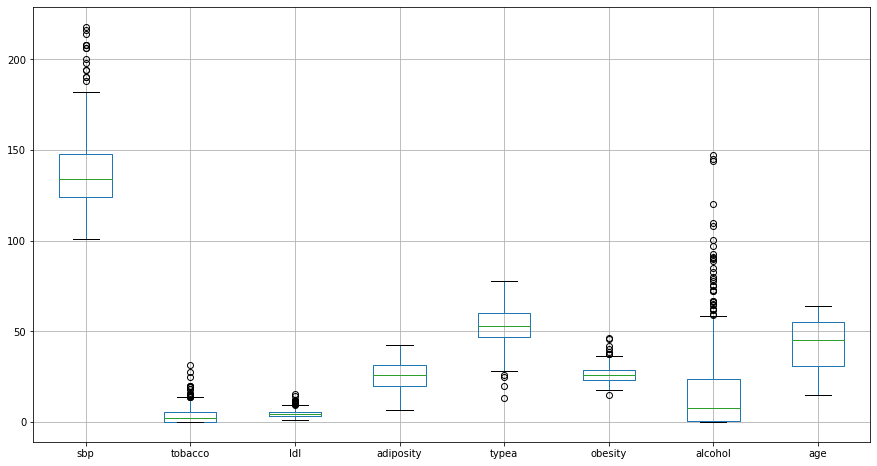

In [5]:
df.boxplot(figsize=(15,8))

C:\Users\jeflores\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


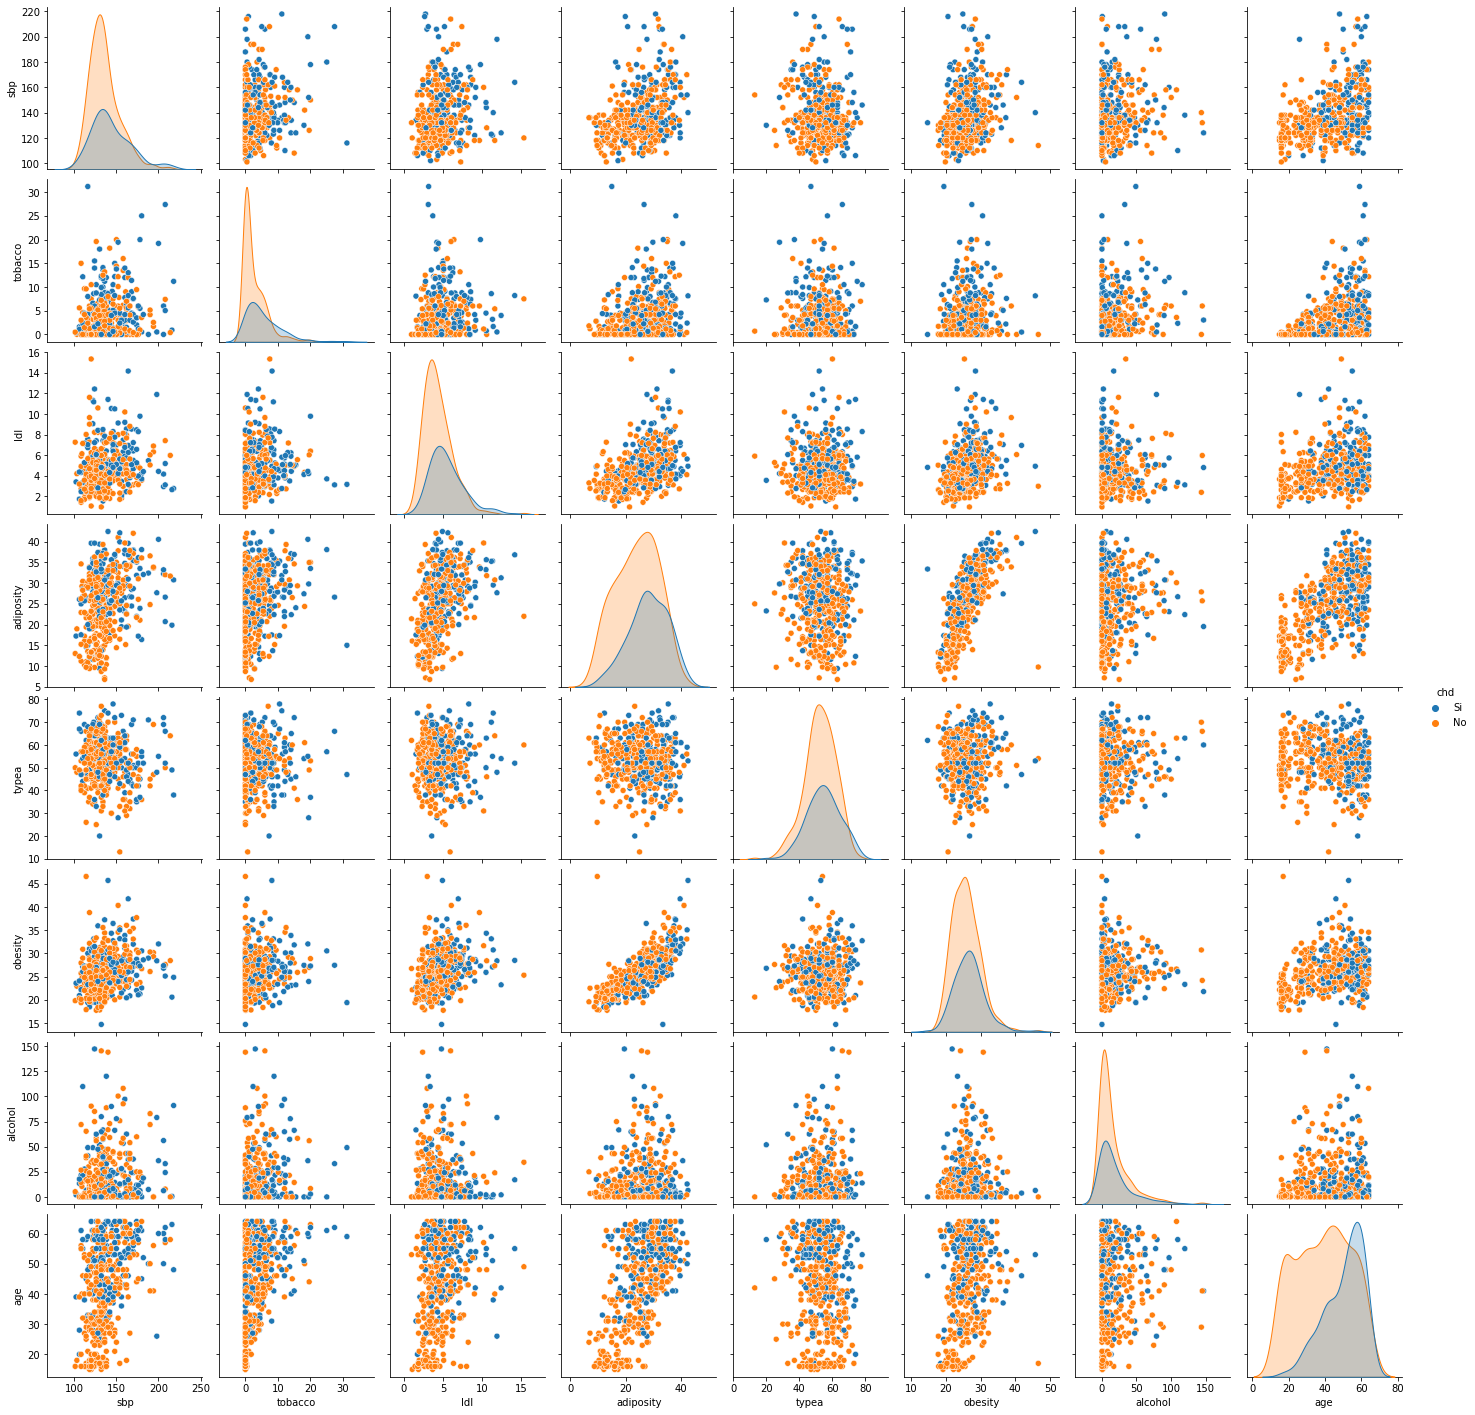

In [6]:
sns.pairplot(df, hue='chd', size=2.5)

<AxesSubplot:xlabel='chd'>

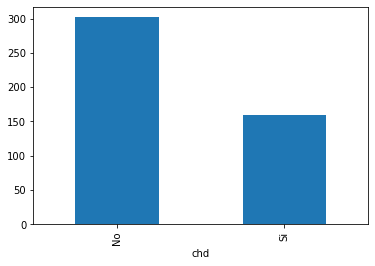

In [7]:
# revisamos la distribución de la variable de respuesta
df.value_counts('chd').plot(kind='bar')

<AxesSubplot:xlabel='chd', ylabel='count'>

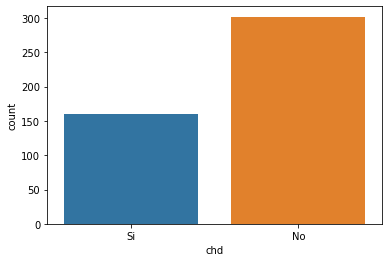

In [8]:
# con seaborn, el plot se ve mejor.
sns.countplot(data=df, x='chd')

In [9]:
df.value_counts('chd')

chd
No    302
Si    160
dtype: int64

In [32]:
target=df['chd_cod']
features=df[['sbp','tobacco','ldl','adiposity','famhistCod','typea','obesity','alcohol','age']]

In [33]:
print(type(target))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [34]:
# separacion de los datos para entrenamiento y validacion.
X_train, X_test, y_train, y_test=train_test_split(
    features,
    target,
    random_state=0,
    test_size=0.1,
    shuffle=False
)

In [69]:
print(X_test.shape)

(47, 9)


In [75]:
y_test.value_counts()

1    36
2    11
Name: chd_cod, dtype: int64

In [13]:
### nuevo ejercicio inicio

In [84]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-10,10,20), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)
print(logreg_cv.best_params_)

{'C': 3.359818286283774, 'penalty': 'l2'}


In [85]:
target_predict=logreg_cv.predict(X_test)

In [86]:
type(target_predict)

numpy.ndarray

In [87]:
## 2:Si 1 NO
unique, counts = np.unique(target_predict, return_counts=True)
dict(zip(unique, counts))

{1: 39, 2: 8}

In [88]:
class_names=['No','Si']

In [89]:
matrix=confusion_matrix(y_test, target_predict)
matrix

array([[32,  4],
       [ 7,  4]], dtype=int64)

<AxesSubplot:>

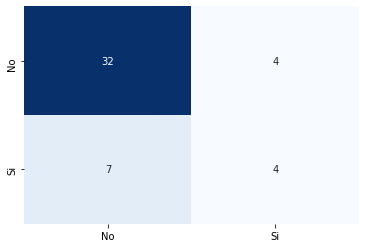

In [90]:
# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")

In [52]:
accuracy_model=logreg_cv.score(X_test, y_test)
print(f"Acucuracy of model: {accuracy_model}")

Acucuracy of model: 0.7659574468085106


### ¿Que efecto hay si realizamos normalización de los datos?

In [ ]:
####nuevo ejercicio fin

In [19]:
# para los datos de entrenamiento, vamos a preprocesar con normalizacion
col_names_X_train_numeric=['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol']
X_train_numeric=X_train[col_names_X_train_numeric]
X_train_numeric
scaler=StandardScaler()
X_train_numeric_scaled=scaler.fit_transform(X_train_numeric)

In [20]:
clasifier=LogisticRegression(random_state=0, class_weight='balanced')
model=clasifier.fit(X_train_numeric_scaled, y_train)

In [21]:
# para los datos de test
col_names_X_test_numeric=['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol']
X_test_numeric=X_test[col_names_X_train_numeric]
X_test_numeric
X_test_numeric_scaled=scaler.fit_transform(X_test_numeric)


In [22]:
# make prediction
target_predict=model.predict(X_test_numeric_scaled)
target_predict

array(['No', 'Si', 'No', 'Si', 'No', 'Si', 'No', 'Si', 'Si', 'No', 'No',
       'Si', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Si', 'Si', 'No', 'No', 'No', 'No',
       'No', 'Si', 'No', 'No', 'Si', 'No', 'Si', 'No', 'Si', 'Si', 'Si',
       'No', 'Si', 'Si'], dtype=object)

In [23]:
matrix=confusion_matrix(y_test, target_predict)
matrix

array([[25, 11],
       [ 5,  6]], dtype=int64)

In [24]:
class_names=['Si','No']

<AxesSubplot:>

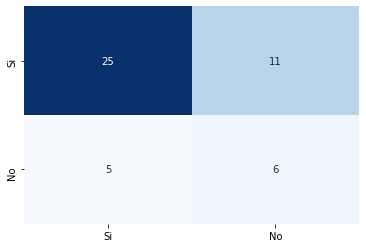

In [25]:
# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")

In [29]:
accuracy_model=model.score(X_test_numeric_scaled, y_test)
print(f"Acucuracy of model: {accuracy_model}")

Acucuracy of model: 0.6595744680851063


In [31]:
accuracy_sklearn=accuracy_score(y_test,target_predict)
print(f"Acucuracy of model with sklearn: {accuracy_sklearn}")

Acucuracy of model with sklearn: 0.6595744680851063


# Random Forest

In [55]:
clf = RandomForestClassifier(max_depth=6, random_state=0)

In [57]:
##X_train, X_test, y_train, y_test

In [59]:
modelo=clf.fit(X_train,y_train)

In [61]:
prediccion=modelo.predict(X_test)

In [62]:
matrix=confusion_matrix(y_test, prediccion)
matrix

array([[33,  3],
       [ 8,  3]], dtype=int64)

In [64]:
accuracy_model=modelo.score(X_test, y_test)
print(f"Acucuracy of model: {accuracy_model}")

Acucuracy of model: 0.7659574468085106


In [65]:
modelo.feature_importances_

array([0.08349294, 0.17141555, 0.14890003, 0.09721497, 0.0668883 ,
       0.10478146, 0.07859086, 0.05647089, 0.19224499])

# Cambiando la etiqueta uno como objetivo

In [9]:
df=pd.read_csv("hearthEt1.csv", sep=';', decimal=',')

In [10]:
df

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhistCod,chd_cod
0,160,12.00,5.73,23.11,49,25.30,97.20,52,2,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,2,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,2,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,2,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,1,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1,1
459,108,3.00,1.59,15.23,40,20.09,26.64,55,1,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,1,0


In [11]:
target=df['chd_cod']
features=df[['sbp','tobacco','ldl','adiposity','famhistCod','typea','obesity','alcohol','age']]

In [12]:
# separacion de los datos para entrenamiento y validacion.
X_train, X_test, y_train, y_test=train_test_split(
    features,
    target,
    random_state=0,
    test_size=0.2,
    shuffle=False
)

In [104]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-10,10,20), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)
print(logreg_cv.best_params_)

{'C': 3.359818286283774, 'penalty': 'l2'}


In [111]:
y_test.value_counts()

0    65
1    28
Name: chd_cod, dtype: int64

In [105]:
target_predict=logreg_cv.predict(X_test)

In [106]:
## 0:No 1 Si
unique, counts = np.unique(target_predict, return_counts=True)
dict(zip(unique, counts))

{0: 66, 1: 27}

In [107]:
class_names=['No','Si']

In [108]:
matrix=confusion_matrix(y_test, target_predict)
matrix

array([[56,  9],
       [10, 18]], dtype=int64)

Text(33.0, 0.5, 'OBSERVADO')

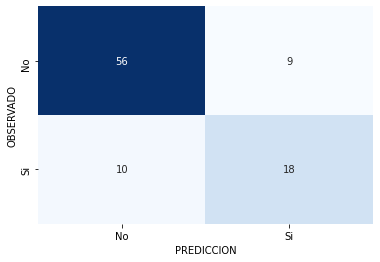

In [114]:
# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")

In [102]:
accuracy_model=logreg_cv.score(X_test, y_test)
print(f"Acucuracy of model: {accuracy_model}")

Acucuracy of model: 0.7956989247311828


In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto'))])

In [6]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','None']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,5,10, 40, 60,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
criterion= ['gini','entropy','log_loss']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2', 'None'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [1, 2, 5, 10, 40, 60, 100], 'min_samples_leaf': [1, 2, 4, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy', 'log_loss']}


In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rc_random = RandomizedSearchCV(rc, random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)# Fit the random search model
rc_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jeflores\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70203628        nan 0.69929656        nan 0.70199926
        nan 0.69389115 0.70199926        nan        nan 0.68293225
 0.71828952        nan 0.7209552  0.68567197        nan 0.70199926
        nan 0.70196224 0.72643465        nan        nan        nan
 0.71007034 0.69925953        nan        nan 0.69929656        nan
        nan        nan        nan        nan        nan        nan
 0.71821548        nan 0.71014439 0.70736764 0.72639763        nan
        nan        nan 0.69651981        nan        nan 0.70211033
        nan        nan        nan        nan        nan 0.6966679
 0.71014439        nan 0.6939652         nan        nan        nan
        nan        nan        nan 0.70199926        nan        nan
 0.70740466        nan        nan        nan 0.69122547        nan
        nan 0.6912625         nan 0.69918549       

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [1, 2, 5, 10, 40,
                                                              60, 100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
   

In [14]:
rc_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 40,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [16]:
prediccion=rc_random.predict(X_test)

In [17]:
matrix=confusion_matrix(y_test, prediccion)
matrix

array([[56,  9],
       [13, 15]], dtype=int64)

In [18]:
class_names=['No','Si']

Text(33.0, 0.5, 'OBSERVADO')

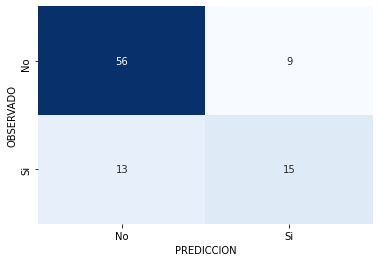

In [19]:
# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")

In [21]:
accuracy_model=rc_random.score(X_test, y_test)
print(f"Acucuracy of model: {accuracy_model}")

Acucuracy of model: 0.7634408602150538
